In [121]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [122]:
# Loading the dataset 
dataset = pd.read_csv("Telco-Customer-Churn.csv")
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Investigating the Dataset


In [123]:
# Columns in the dataset
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [124]:
# Check the shape of the dataset 
dataset.shape

(7043, 21)

In [125]:
# Check if the dataset has missing data
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [126]:
# Summary Statistics 
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The dataset looks OK and can be used for Data Analysis

#### 1. Churn Rate Analysis 
- investigate the churn rate as a percentage of a customers who have churned and,
- Visualizing the same in a pie chart or bar chart.

In [128]:
# Percentage of customers who have churned 
percentage_churn = dataset.Churn.value_counts(normalize=True) * 100

# Create a dataframe so that it is easier to plot the percentages 
churn_rate_df = percentage_churn.reset_index()

# Setting column names 
churn_rate_df.columns = ["Churn", "Percentage"]

churn_rate_df

,Churn,Percentage
0,No,73.463013
1,Yes,26.536987


Text(0.5, 1.0, 'Churn Rate')

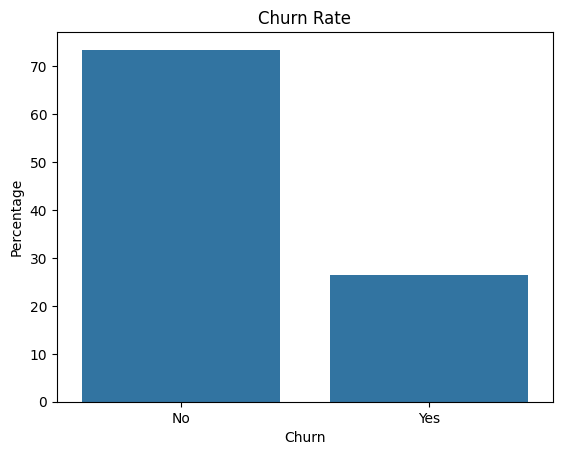

In [129]:
# Visualizing the churn rate 
sns.barplot(churn_rate_df, x="Churn", y="Percentage")

plt.title("Churn Rate")

([<matplotlib.patches.Wedge at 0x2db537d92d0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73%'),
  Text(0.4032915008338864, -0.4442476396731348, '27%')])

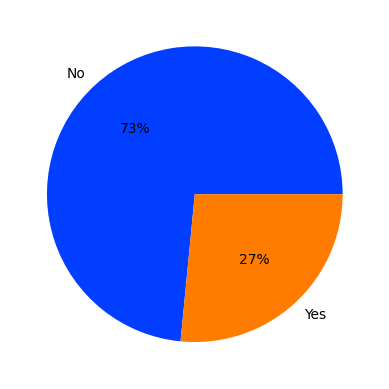

In [130]:
# Visualizing the same using a pie chart 
plt.pie(churn_rate_df.Percentage, labels=["No", "Yes"], colors=sns.color_palette("bright"), autopct="%.0f%%")

#### 2. Demographic Analsysis 
- Segmenting the customers into different groups based on age, gender, and income then find the churn rate for each segment

In [131]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### i). Gender

In [132]:
churn_rate_by_gender = dataset.groupby("gender").Churn.value_counts(normalize=True) * 100
churn_rate_by_gender

gender  Churn
Female  No       73.079128
        Yes      26.920872
Male    No       73.839662
        Yes      26.160338
Name: proportion, dtype: float64

In [133]:
# Creating a dataframe to make it easier to plot 
churn_rate_by_gender_df = churn_rate_by_gender.reset_index()
churn_rate_by_gender_df.columns = ["Gender", "Churn", "Percentage"]

churn_rate_by_gender_df

,Gender,Churn,Percentage
0,Female,No,73.079128
1,Female,Yes,26.920872
2,Male,No,73.839662
3,Male,Yes,26.160338


Text(0.5, 1.0, 'Churn Rate by Gender')

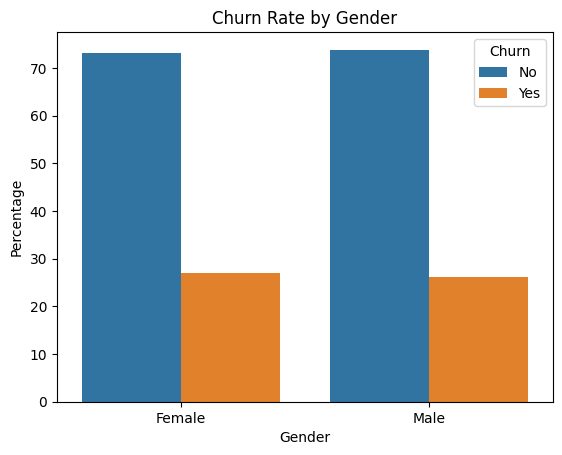

In [134]:
sns.barplot(churn_rate_by_gender_df, x="Gender", y="Percentage", hue="Churn")
plt.title("Churn Rate by Gender")

There is no significance difference in the churn rate for both Male and Female customers

##### ii). Age
This will be based on whether the customer is a Senior Citizen (Elderly Customers)

In [135]:
churn_rate_by_age = dataset.groupby("SeniorCitizen").Churn.value_counts(normalize=True) * 100 
churn_rate_by_age

SeniorCitizen  Churn
0              No       76.393832
               Yes      23.606168
1              No       58.318739
               Yes      41.681261
Name: proportion, dtype: float64

In [136]:
churn_rate_by_age_df = churn_rate_by_age.reset_index()
churn_rate_by_age_df.columns = ["SeniorCitizen", "Churn", "Percentage"]

churn_rate_by_age_df

,SeniorCitizen,Churn,Percentage
0,0,No,76.393832
1,0,Yes,23.606168
2,1,No,58.318739
3,1,Yes,41.681261


Text(0, 0.5, '% Churn Rate')

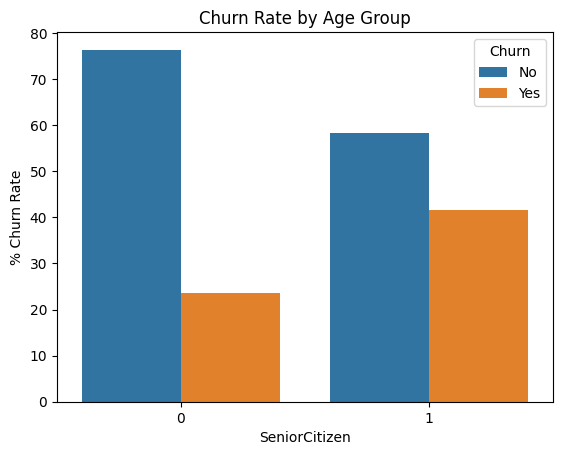

In [137]:
sns.barplot(churn_rate_by_age_df, x="SeniorCitizen", y="Percentage", hue="Churn")
plt.title("Churn Rate by Age Group")
plt.ylabel("% Churn Rate")


A large number of customers who did not churn were young (that is, not senior citizens) 

A large number of customers who churned were elderly (that is, senior citizens)

In [138]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 2. How usage of different services or features correlate with Churn. 
Services include; 
- InternetService 
- PhoneService
- StreamingTV 
- StreamingMovies 
- PhoneService
- OnlineSecurity 
- OnlineBackup 
- DeviceProtection
- TechSupport

i). InternetService

In [139]:
# Internet Service
print("Internet Services Include...")
for provider in dataset.InternetService.unique():
    if provider == "No":
        break
    print("-", provider)

Internet Services Include...
- DSL
- Fiber optic


In [140]:
# Churn rate by Internet Service
churn_rate = dataset.groupby("InternetService").Churn.value_counts(normalize=True) * 100 
churn_rate

InternetService  Churn
DSL              No       81.040892
                 Yes      18.959108
Fiber optic      No       58.107235
                 Yes      41.892765
No               No       92.595020
                 Yes       7.404980
Name: proportion, dtype: float64

In [141]:
churn_rate = churn_rate.reset_index()

Text(0.5, 1.0, 'Churn Rate by Internet Service')

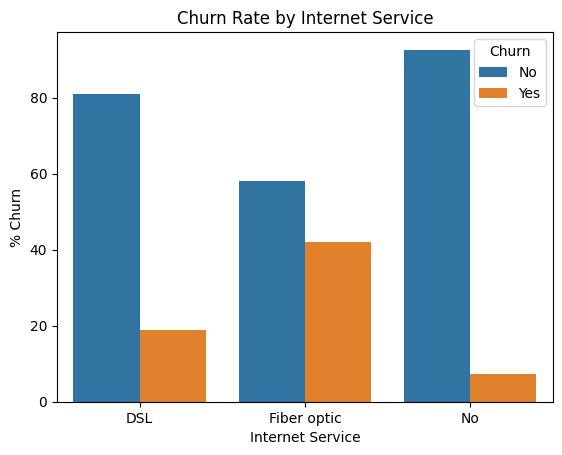

In [142]:
sns.barplot(churn_rate, x="InternetService", y="proportion", hue="Churn")
plt.ylabel("% Churn") 
plt.xlabel("Internet Service")
plt.title("Churn Rate by Internet Service")

Most of the customers who churned used Fiber Optic Internet Service \
The plot also show that those who used Fiber Optic were more likely to churn whereas those did not have any internet service were less likely to Churn.


##### ii). PhoneService

In [143]:
# Churn rate by PhoneService 
churn_rate = dataset.groupby("PhoneService").Churn.value_counts(normalize=True) * 100
churn_rate

PhoneService  Churn
No            No       75.073314
              Yes      24.926686
Yes           No       73.290363
              Yes      26.709637
Name: proportion, dtype: float64

In [144]:
churn_rate = churn_rate.reset_index()
churn_rate

,PhoneService,Churn,proportion
0,No,No,75.073314
1,No,Yes,24.926686
2,Yes,No,73.290363
3,Yes,Yes,26.709637


Text(0, 0.5, 'Churn Rate')

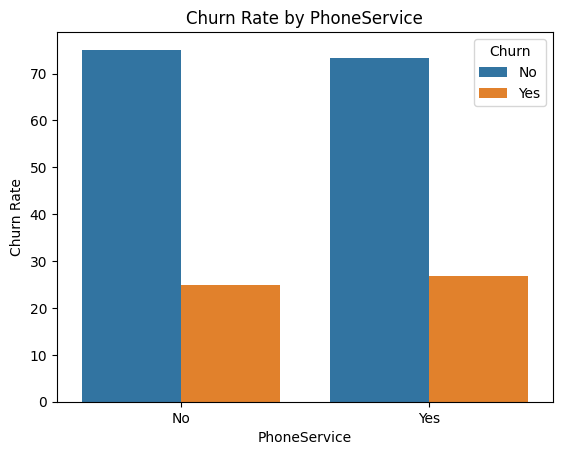

In [145]:
sns.barplot(churn_rate, x="PhoneService", y="proportion", hue="Churn")
plt.title("Churn Rate by PhoneService") 
plt.ylabel("Churn Rate")

- There is no significance difference in the Churn rate between the customers who had PhoneService and those who did not have.

#### iii). StreamingTV

In [146]:
churn_rate = dataset.groupby("StreamingTV").Churn.value_counts(normalize=True) *100 
churn_rate

StreamingTV          Churn
No                   No       66.476868
                     Yes      33.523132
No internet service  No       92.595020
                     Yes       7.404980
Yes                  No       69.929812
                     Yes      30.070188
Name: proportion, dtype: float64

In [147]:
churn_rate = churn_rate.reset_index()
churn_rate

,StreamingTV,Churn,proportion
0,No,No,66.476868
1,No,Yes,33.523132
2,No internet service,No,92.595020
3,No internet service,Yes,7.404980
4,Yes,No,69.929812
5,Yes,Yes,30.070188


Text(0.5, 1.0, 'Churn Rate by StreamingTV')

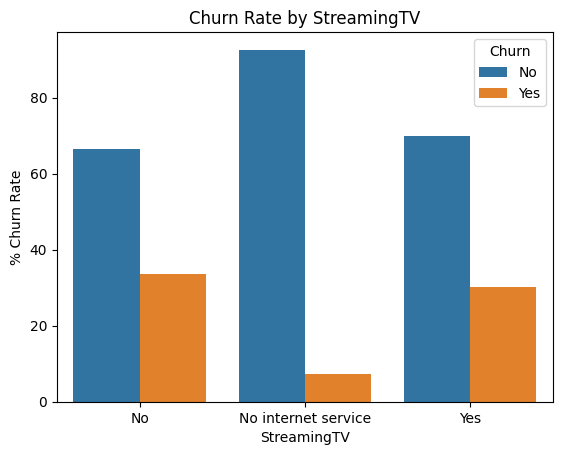

In [148]:
sns.barplot(churn_rate, x="StreamingTV", y="proportion", hue="Churn")
plt.ylabel("% Churn Rate") 
plt.title("Churn Rate by StreamingTV") 

- Customers with No Internet Service were less likely to Churn. This could have been attributed by the fact that \ Internet Service made the subscription a little expensive hence the tendency to churn for those with or without StreamingTV service.

#### iv). OnlineSecurity 


In [149]:
churn_rate = dataset.groupby("OnlineSecurity").Churn.value_counts(normalize=True) * 100 
churn_rate

OnlineSecurity       Churn
No                   No       58.233276
                     Yes      41.766724
No internet service  No       92.595020
                     Yes       7.404980
Yes                  No       85.388806
                     Yes      14.611194
Name: proportion, dtype: float64

In [152]:
churn_rate = churn_rate.reset_index()
churn_rate

,OnlineSecurity,Churn,proportion
0,No,No,58.233276
1,No,Yes,41.766724
2,No internet service,No,92.595020
3,No internet service,Yes,7.404980
4,Yes,No,85.388806
5,Yes,Yes,14.611194


Text(0.5, 1.0, 'Churn Rate by OnlineSecurity')

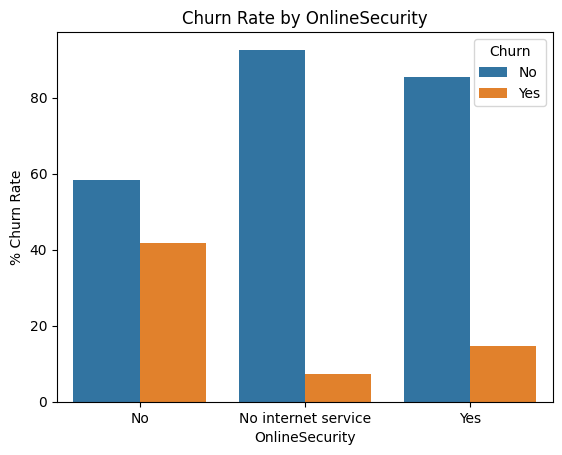

In [154]:
sns.barplot(churn_rate, x="OnlineSecurity", y="proportion", hue="Churn")
plt.ylabel("% Churn Rate")
plt.title("Churn Rate by OnlineSecurity")

Churn rate for customers without OnlineSecurity service was higher compared to those with no internet service and those with online security service. The telco should most probably provide a more affordable internet to reduce churn for this customers.

#### v). OnlineBackup